In [19]:
import pandas as pd
import numpy as np
import notebooks.utils as utils
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import zipfile
import os


warnings.filterwarnings('i,gnore')

# Loading data

In [41]:
# Specify the ZIP file name
zip_filename = "../dataset/filtered.zip"

# Extract the model file from the ZIP archive
with zipfile.ZipFile(zip_filename, "r") as archive:
    # Extract the model file (named "your_model.pkl" in this example)
    archive.extract("filtered.pkl")

# Load the model
df = joblib.load("filtered.pkl")  # Replace with "pickle.load" if you used pickle

os.remove("filtered.pkl")


In [42]:
df.head()

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
11096,0,2016-01-01 08:00:00,0.0,0,Education,7432,2008.0,NaN,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
11097,1,2016-01-01 08:00:00,0.0,0,Education,2720,2004.0,NaN,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
11098,2,2016-01-01 08:00:00,0.0,0,Education,5376,1991.0,NaN,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
11099,3,2016-01-01 08:00:00,0.0,0,Education,23685,2002.0,NaN,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
11100,4,2016-01-01 08:00:00,0.0,0,Education,116607,1975.0,NaN,20.6,NaN,20.0,0.0,1018.1,0.0,0.0


# Amount of data and nans

[Text(0.175, 0, 'floor_count'),
 Text(1.175, 0, 'year_built'),
 Text(2.175, 0, 'cloud_coverage'),
 Text(3.175, 0, 'precip_depth_1_hr'),
 Text(4.175, 0, 'sea_level_pressure'),
 Text(5.175, 0, 'wind_direction'),
 Text(6.175, 0, 'wind_speed'),
 Text(7.175, 0, 'dew_temperature'),
 Text(8.175, 0, 'air_temperature'),
 Text(9.175, 0, 'building_id'),
 Text(10.175, 0, 'timestamp'),
 Text(11.175, 0, 'site_id'),
 Text(12.175, 0, 'primary_use'),
 Text(13.175, 0, 'square_feet')]

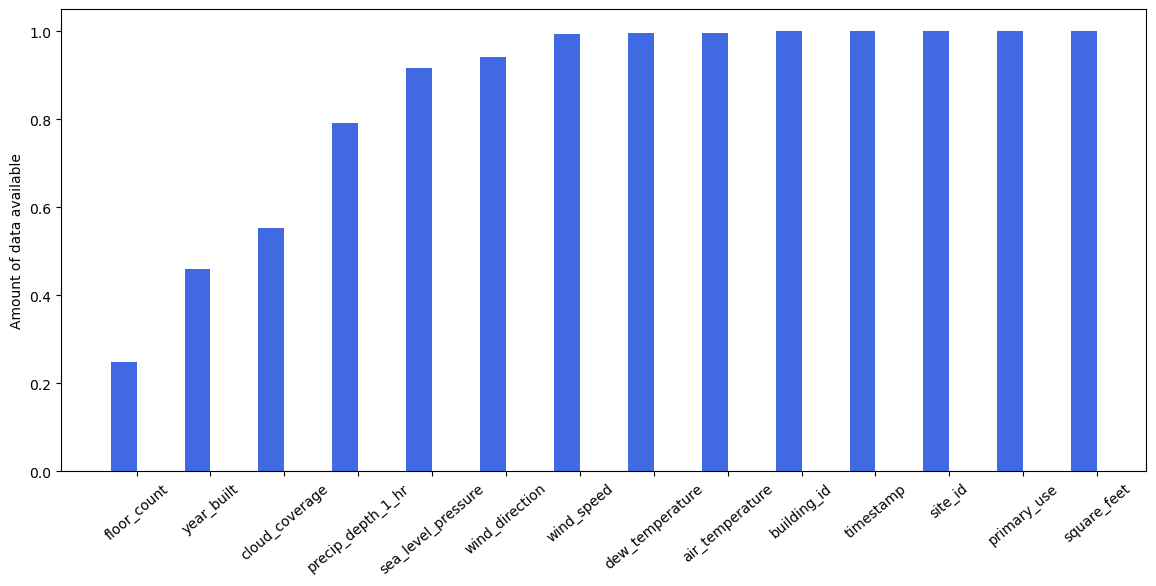

In [43]:
df_data = (df.count() / len(df)).drop('meter_reading').sort_values().values
ind = np.arange(len(df_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, df_data, width, color='royalblue')



axes.set_ylabel('Amount of data available');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels((df.count() / len(df)).drop('meter_reading').sort_values().index, rotation=40)


# Analyze Target Variable

In [44]:
df['meter_reading'].describe()

count    3.920068e+06
mean     1.865213e+02
std      4.320368e+02
min      0.000000e+00
25%      2.329000e+01
50%      7.560000e+01
75%      1.857000e+02
max      4.433650e+04
Name: meter_reading, dtype: float64

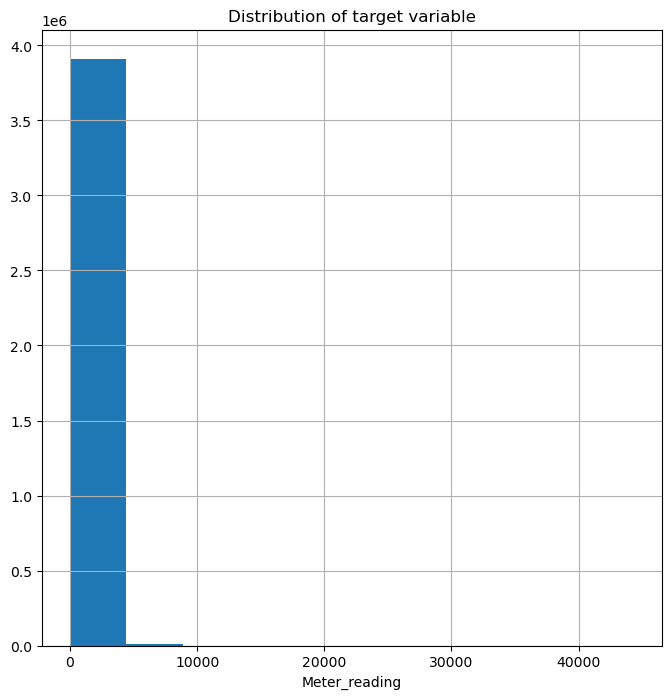

In [45]:
plt.figure(figsize=(8,8))
df['meter_reading'].hist()
plt.xlabel("Meter_reading")
plt.title("Distribution of target variable")
plt.show()

As we can see our target variable heavily skewed and not much of insights can be gathered from the above plot. Hence use log transformation.

In [46]:
df['log_meter_reading']=np.log1p(df['meter_reading'])
df.head()

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,log_meter_reading
11096,0,2016-01-01 08:00:00,0.0,0,Education,7432,2008.0,NaN,20.6,NaN,20.0,0.0,1018.1,0.0,0.0,0.0
11097,1,2016-01-01 08:00:00,0.0,0,Education,2720,2004.0,NaN,20.6,NaN,20.0,0.0,1018.1,0.0,0.0,0.0
11098,2,2016-01-01 08:00:00,0.0,0,Education,5376,1991.0,NaN,20.6,NaN,20.0,0.0,1018.1,0.0,0.0,0.0
11099,3,2016-01-01 08:00:00,0.0,0,Education,23685,2002.0,NaN,20.6,NaN,20.0,0.0,1018.1,0.0,0.0,0.0
11100,4,2016-01-01 08:00:00,0.0,0,Education,116607,1975.0,NaN,20.6,NaN,20.0,0.0,1018.1,0.0,0.0,0.0


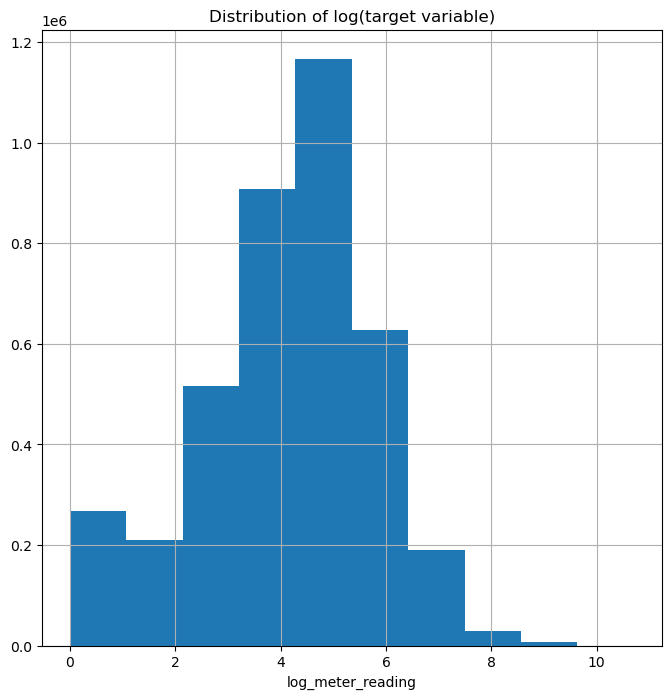

In [47]:
plt.figure(figsize=(8,8))
df['log_meter_reading'].hist()
plt.xlabel("log_meter_reading")
plt.title("Distribution of log(target variable)")
plt.show()

Now, the meter readings have a good variance after transformation

In [48]:
df= utils.break_datetime(df)
df.head()

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,log_meter_reading,year,weekofyear,dayofweek,month,hour
11096,0,2016-01-01 08:00:00,0.0,0,Education,7432,2008.0,NaN,20.6,NaN,...,0.0,1018.1,0.0,0.0,0.0,2015,53,5,1,8
11097,1,2016-01-01 08:00:00,0.0,0,Education,2720,2004.0,NaN,20.6,NaN,...,0.0,1018.1,0.0,0.0,0.0,2015,53,5,1,8
11098,2,2016-01-01 08:00:00,0.0,0,Education,5376,1991.0,NaN,20.6,NaN,...,0.0,1018.1,0.0,0.0,0.0,2015,53,5,1,8
11099,3,2016-01-01 08:00:00,0.0,0,Education,23685,2002.0,NaN,20.6,NaN,...,0.0,1018.1,0.0,0.0,0.0,2015,53,5,1,8
11100,4,2016-01-01 08:00:00,0.0,0,Education,116607,1975.0,NaN,20.6,NaN,...,0.0,1018.1,0.0,0.0,0.0,2015,53,5,1,8


###  Hourly reading

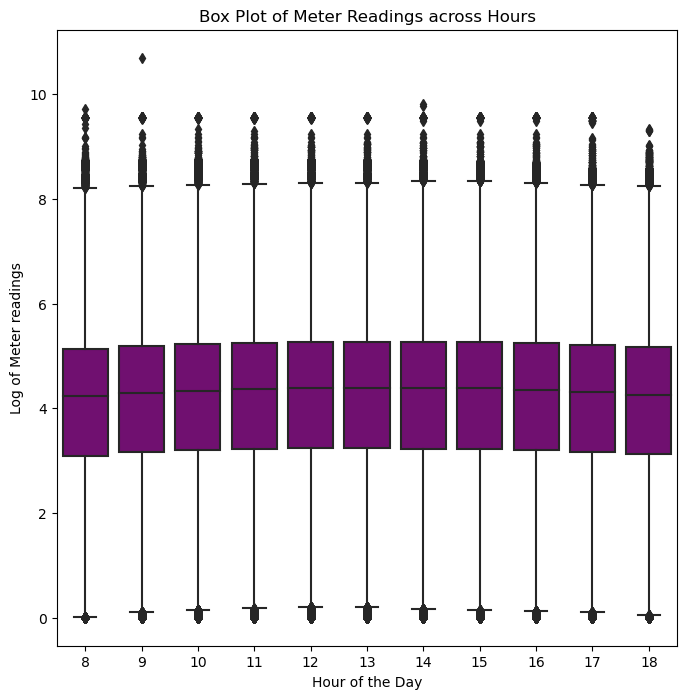

In [49]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='hour', y='log_meter_reading', data=df, color='purple')

# Set labels and title
plt.ylabel("Log of Meter readings")
plt.xlabel("Hour of the Day")
plt.title("Box Plot of Meter Readings across Hours")

# Show the plot
plt.show()

### Daily reading

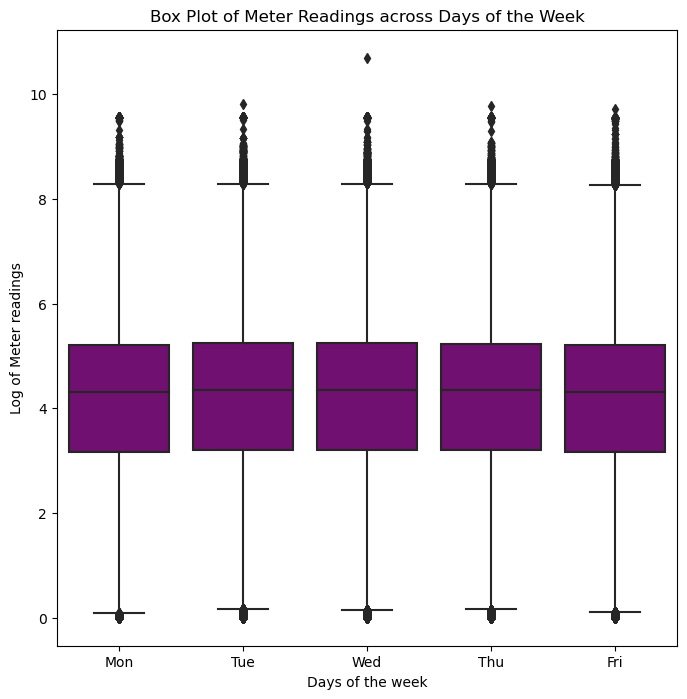

In [50]:
plt.figure(figsize=(8, 8))
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Create a box plot
sns.boxplot(x='dayofweek', y='log_meter_reading', data=df, color='purple')

# Set labels and title
plt.xlabel('Days of the week')
plt.ylabel("Log of Meter readings")
plt.title("Box Plot of Meter Readings across Days of the Week")

# Set x-axis tick labels
plt.xticks(range(len(day_labels)), day_labels)

# Show the plot
plt.show()

### Monthly Reading

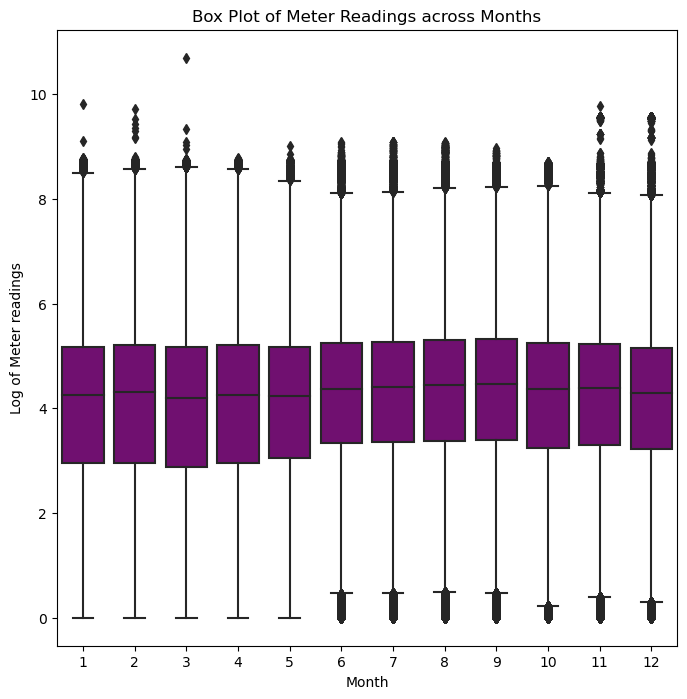

In [74]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='month', y='log_meter_reading', data=df, color='purple')

# Set labels and title
plt.ylabel("Log of Meter readings")
plt.xlabel("Month")
plt.title("Box Plot of Meter Readings across Months")

# Show the plot
plt.show()

### Average weekly usage

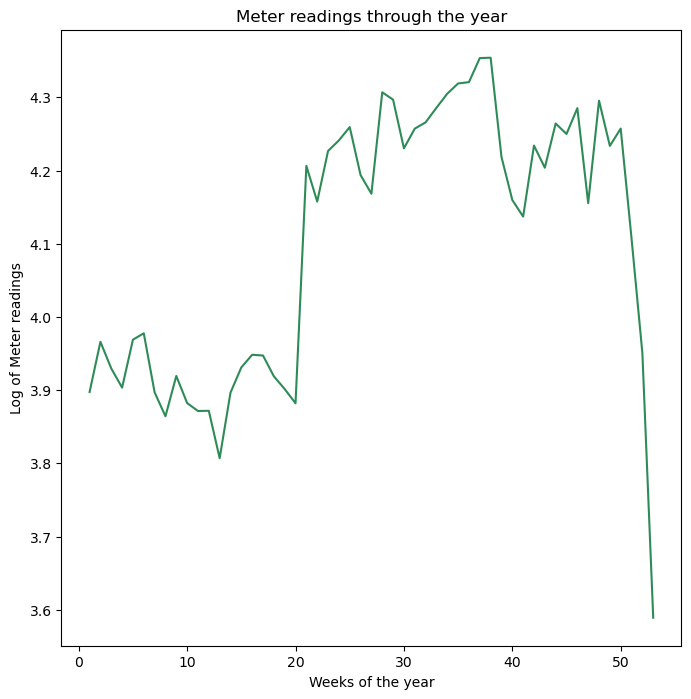

In [52]:
plt.figure(figsize=(8,8))
week_df= df.groupby(['weekofyear']).log_meter_reading.mean().reset_index()
sns.lineplot(x=week_df['weekofyear'], y=week_df['log_meter_reading'], color='seagreen')
plt.xlabel("Weeks of the year")
plt.ylabel("Log of Meter readings")
plt.title("Meter readings through the year")
plt.show()

### Count plot of primary use

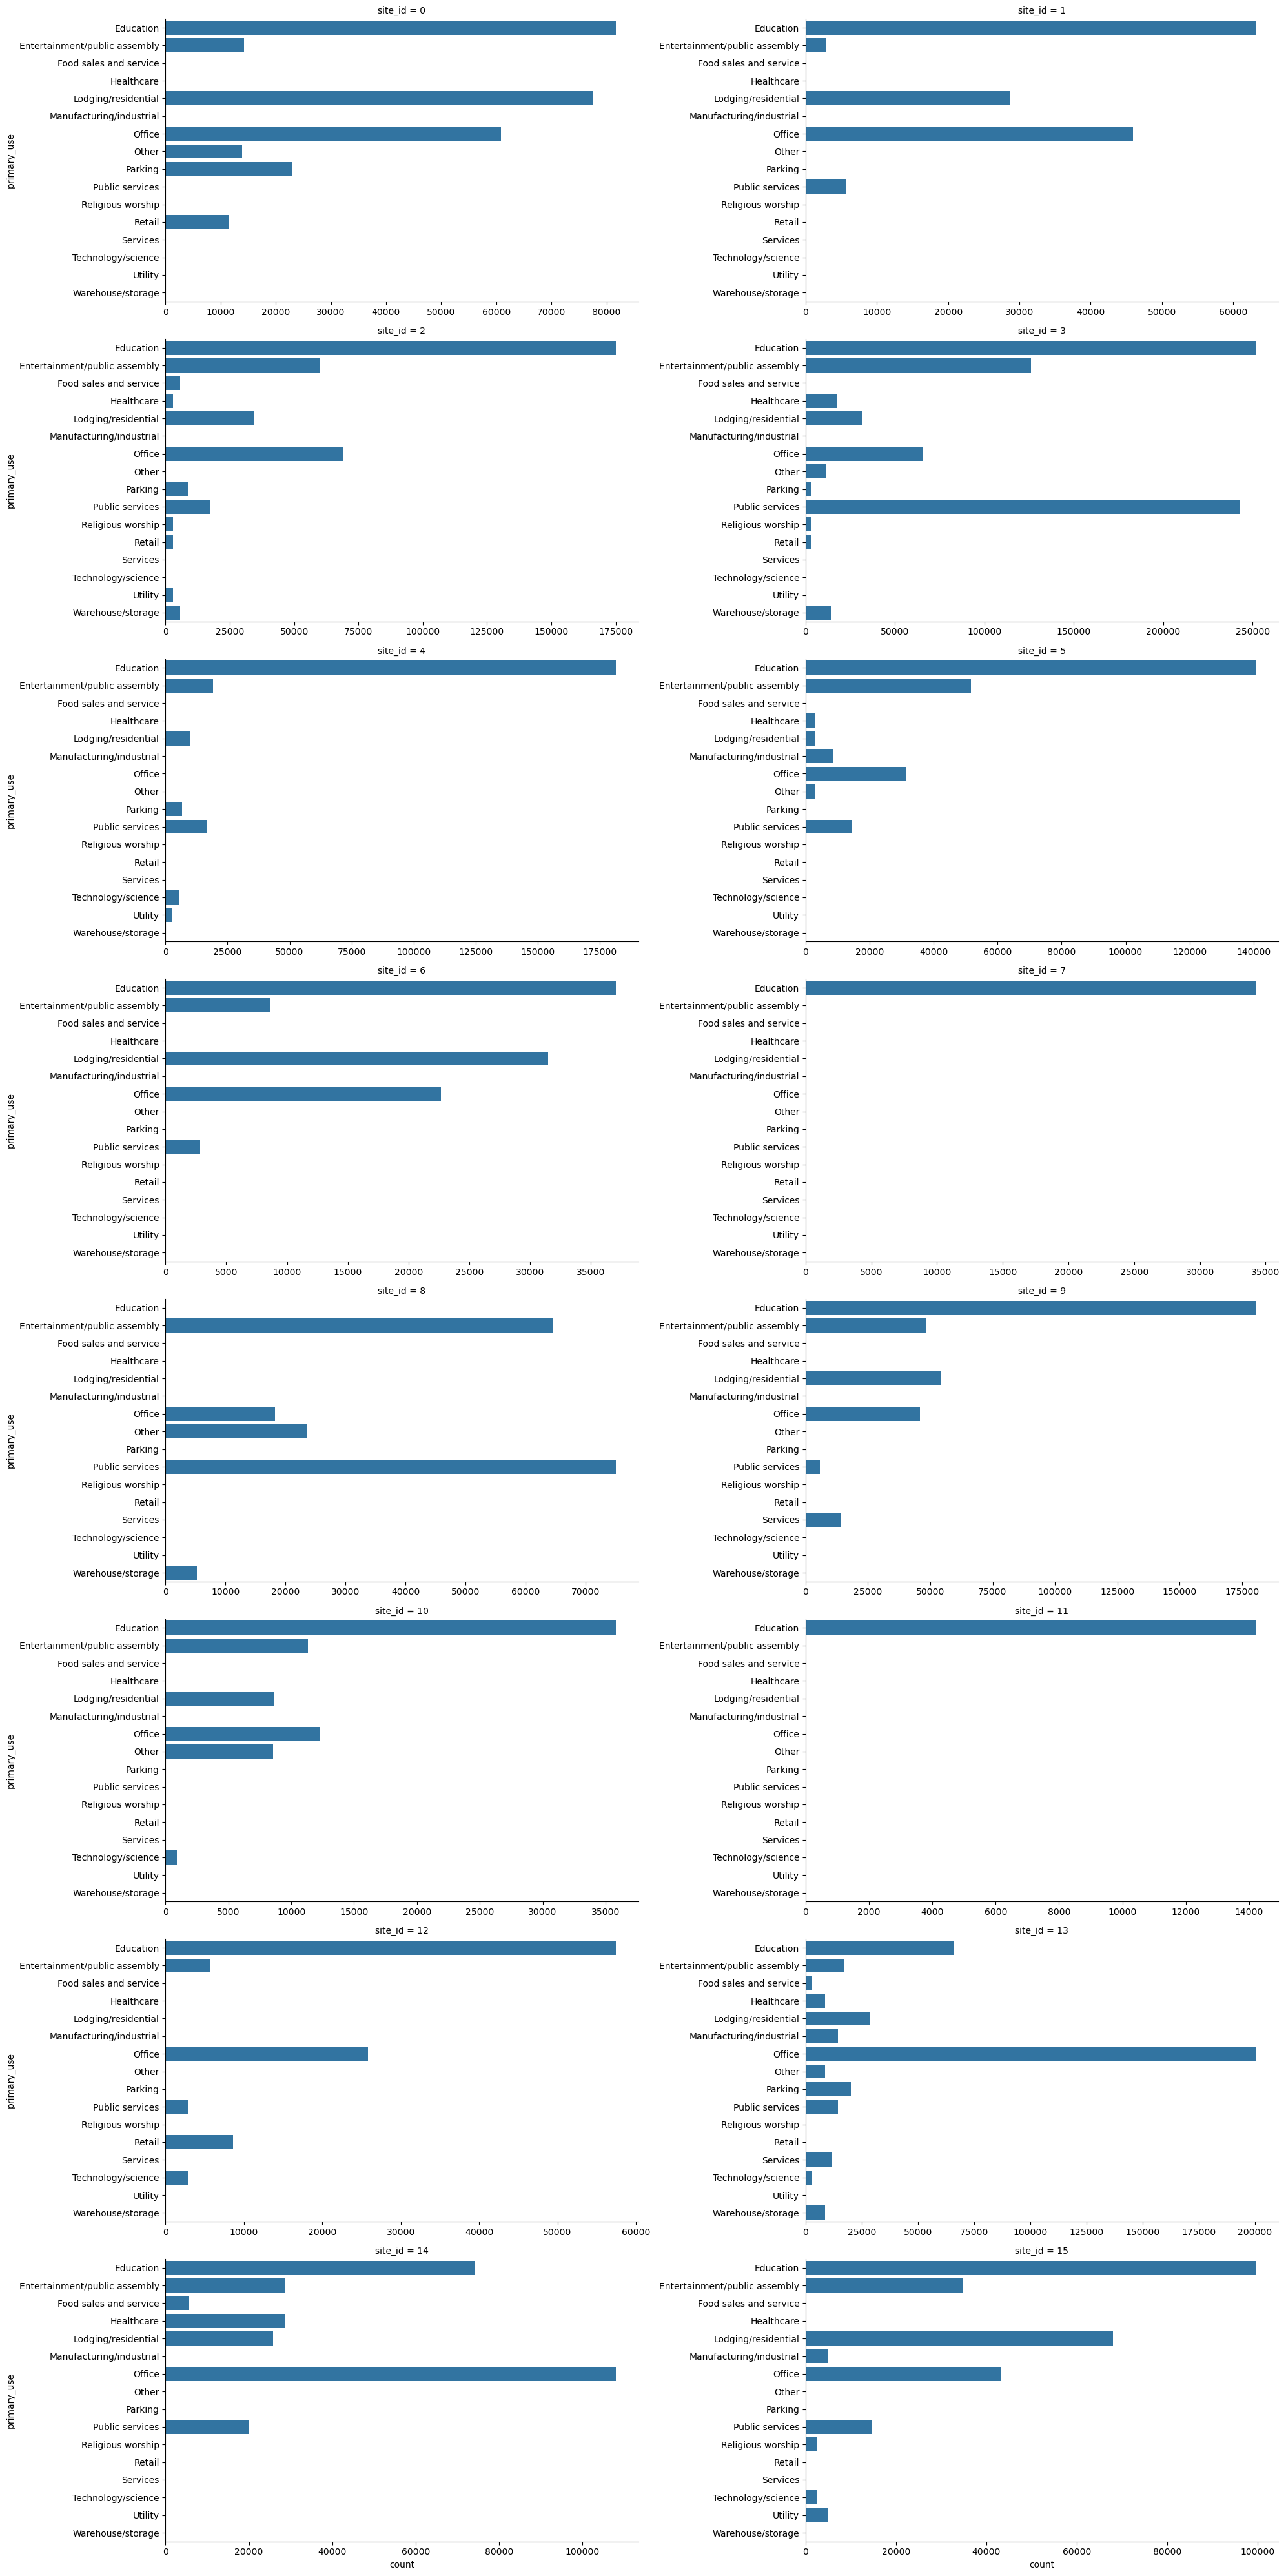

In [53]:
primary_use_df= df.groupby(['primary_use','site_id']).size().reset_index(name='count')
p=sns.FacetGrid(primary_use_df, col='site_id', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.barplot, 'count','primary_use', order=primary_use_df['primary_use'].unique())  # Specify order for categorical data
plt.show()

#plt.figure(figsize=(8,8))
#sns.countplot(y='primary_use', data=train)

Most number of readings are present for educational institutes followed by office, enetertainment and Lodging/residential buildings.

### Average hourly consumption by primary use

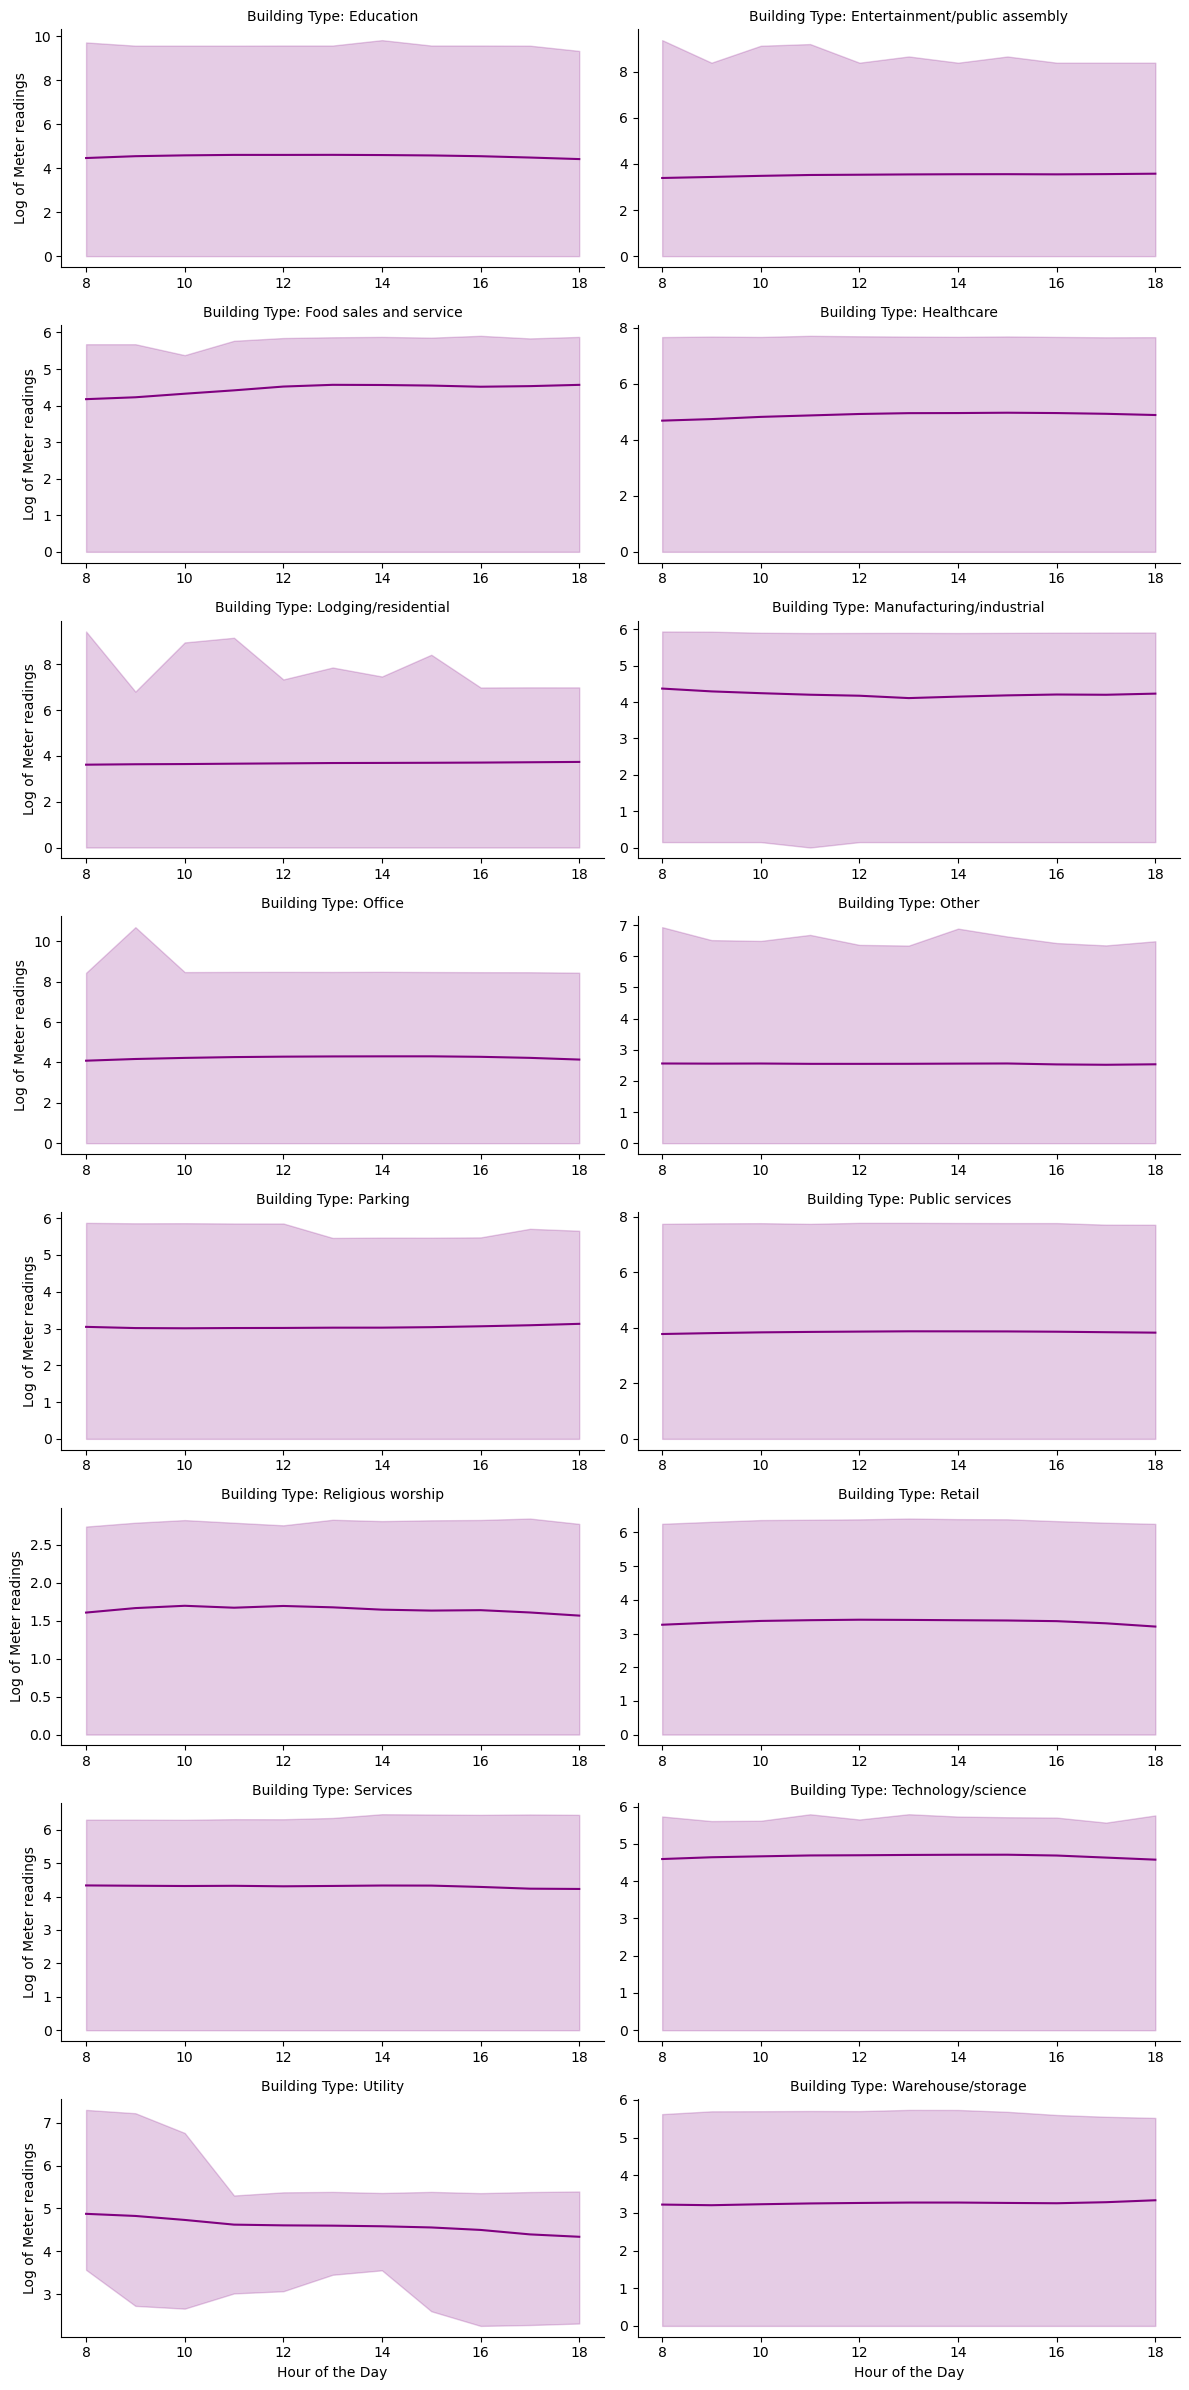

In [76]:

# Hourly average readings based on type of buildings
hour_use_df = df.groupby(['hour', 'primary_use']).log_meter_reading.agg(['mean', 'min', 'max']).reset_index()

# Set up FacetGrid
p = sns.FacetGrid(hour_use_df, col='primary_use', col_wrap=2, height=3, aspect=2, sharey=False, sharex=False)

# Map line plots for the average line
p.map(sns.lineplot, 'hour', 'mean', color='purple')

# Map shaded regions between min and max values
p.map(plt.fill_between, 'hour', 'min', 'max', color='purple', alpha=0.2)

# Set labels and title
p.set_axis_labels('Hour of the Day', 'Log of Meter readings')
p.set_titles('Building Type: {col_name}')

# Show the plot
plt.show()


### Average daily consumption by primary use

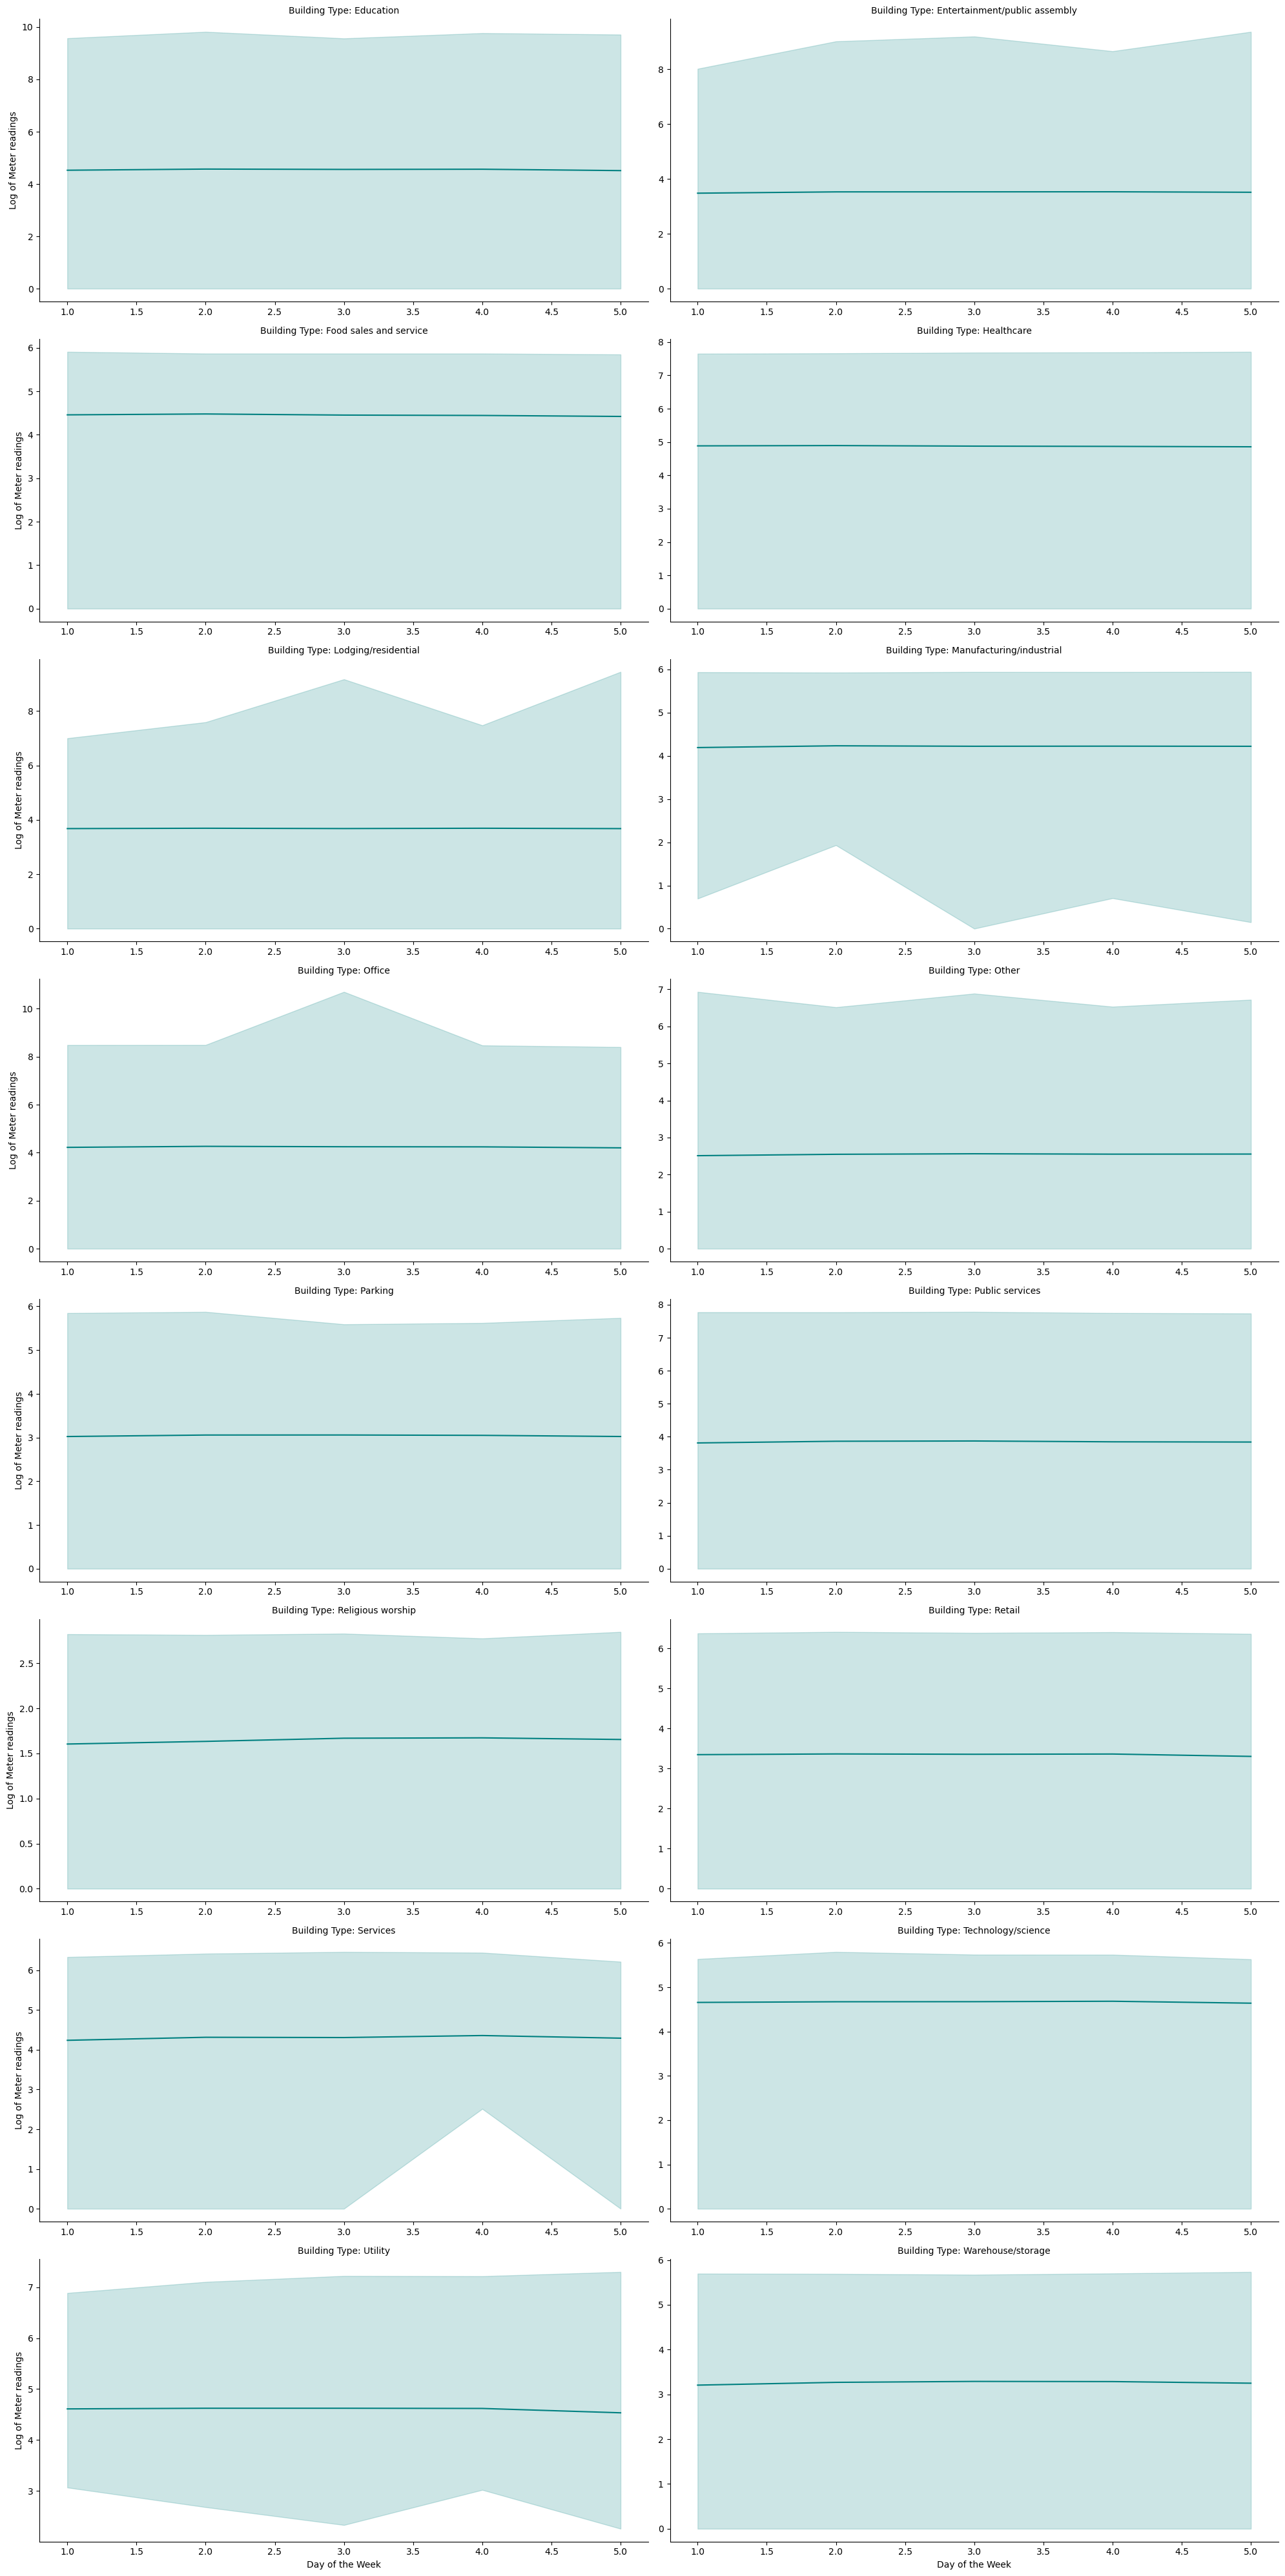

In [77]:
# Daily average readings based on type of buildings
day_use_df = df.groupby(['dayofweek', 'primary_use']).log_meter_reading.agg(['mean', 'min', 'max']).reset_index()

# Set up FacetGrid
p = sns.FacetGrid(day_use_df, col='primary_use', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)

# Map line plots for the average line
p.map(sns.lineplot, 'dayofweek', 'mean', color='teal')

# Map shaded regions between min and max values
p.map(plt.fill_between, 'dayofweek', 'min', 'max', color='teal', alpha=0.2)

# Set labels and title
p.set_axis_labels('Day of the Week', 'Log of Meter readings')
p.set_titles('Building Type: {col_name}')

# Show the plot
plt.show()

### Average monthly consumption by primary use

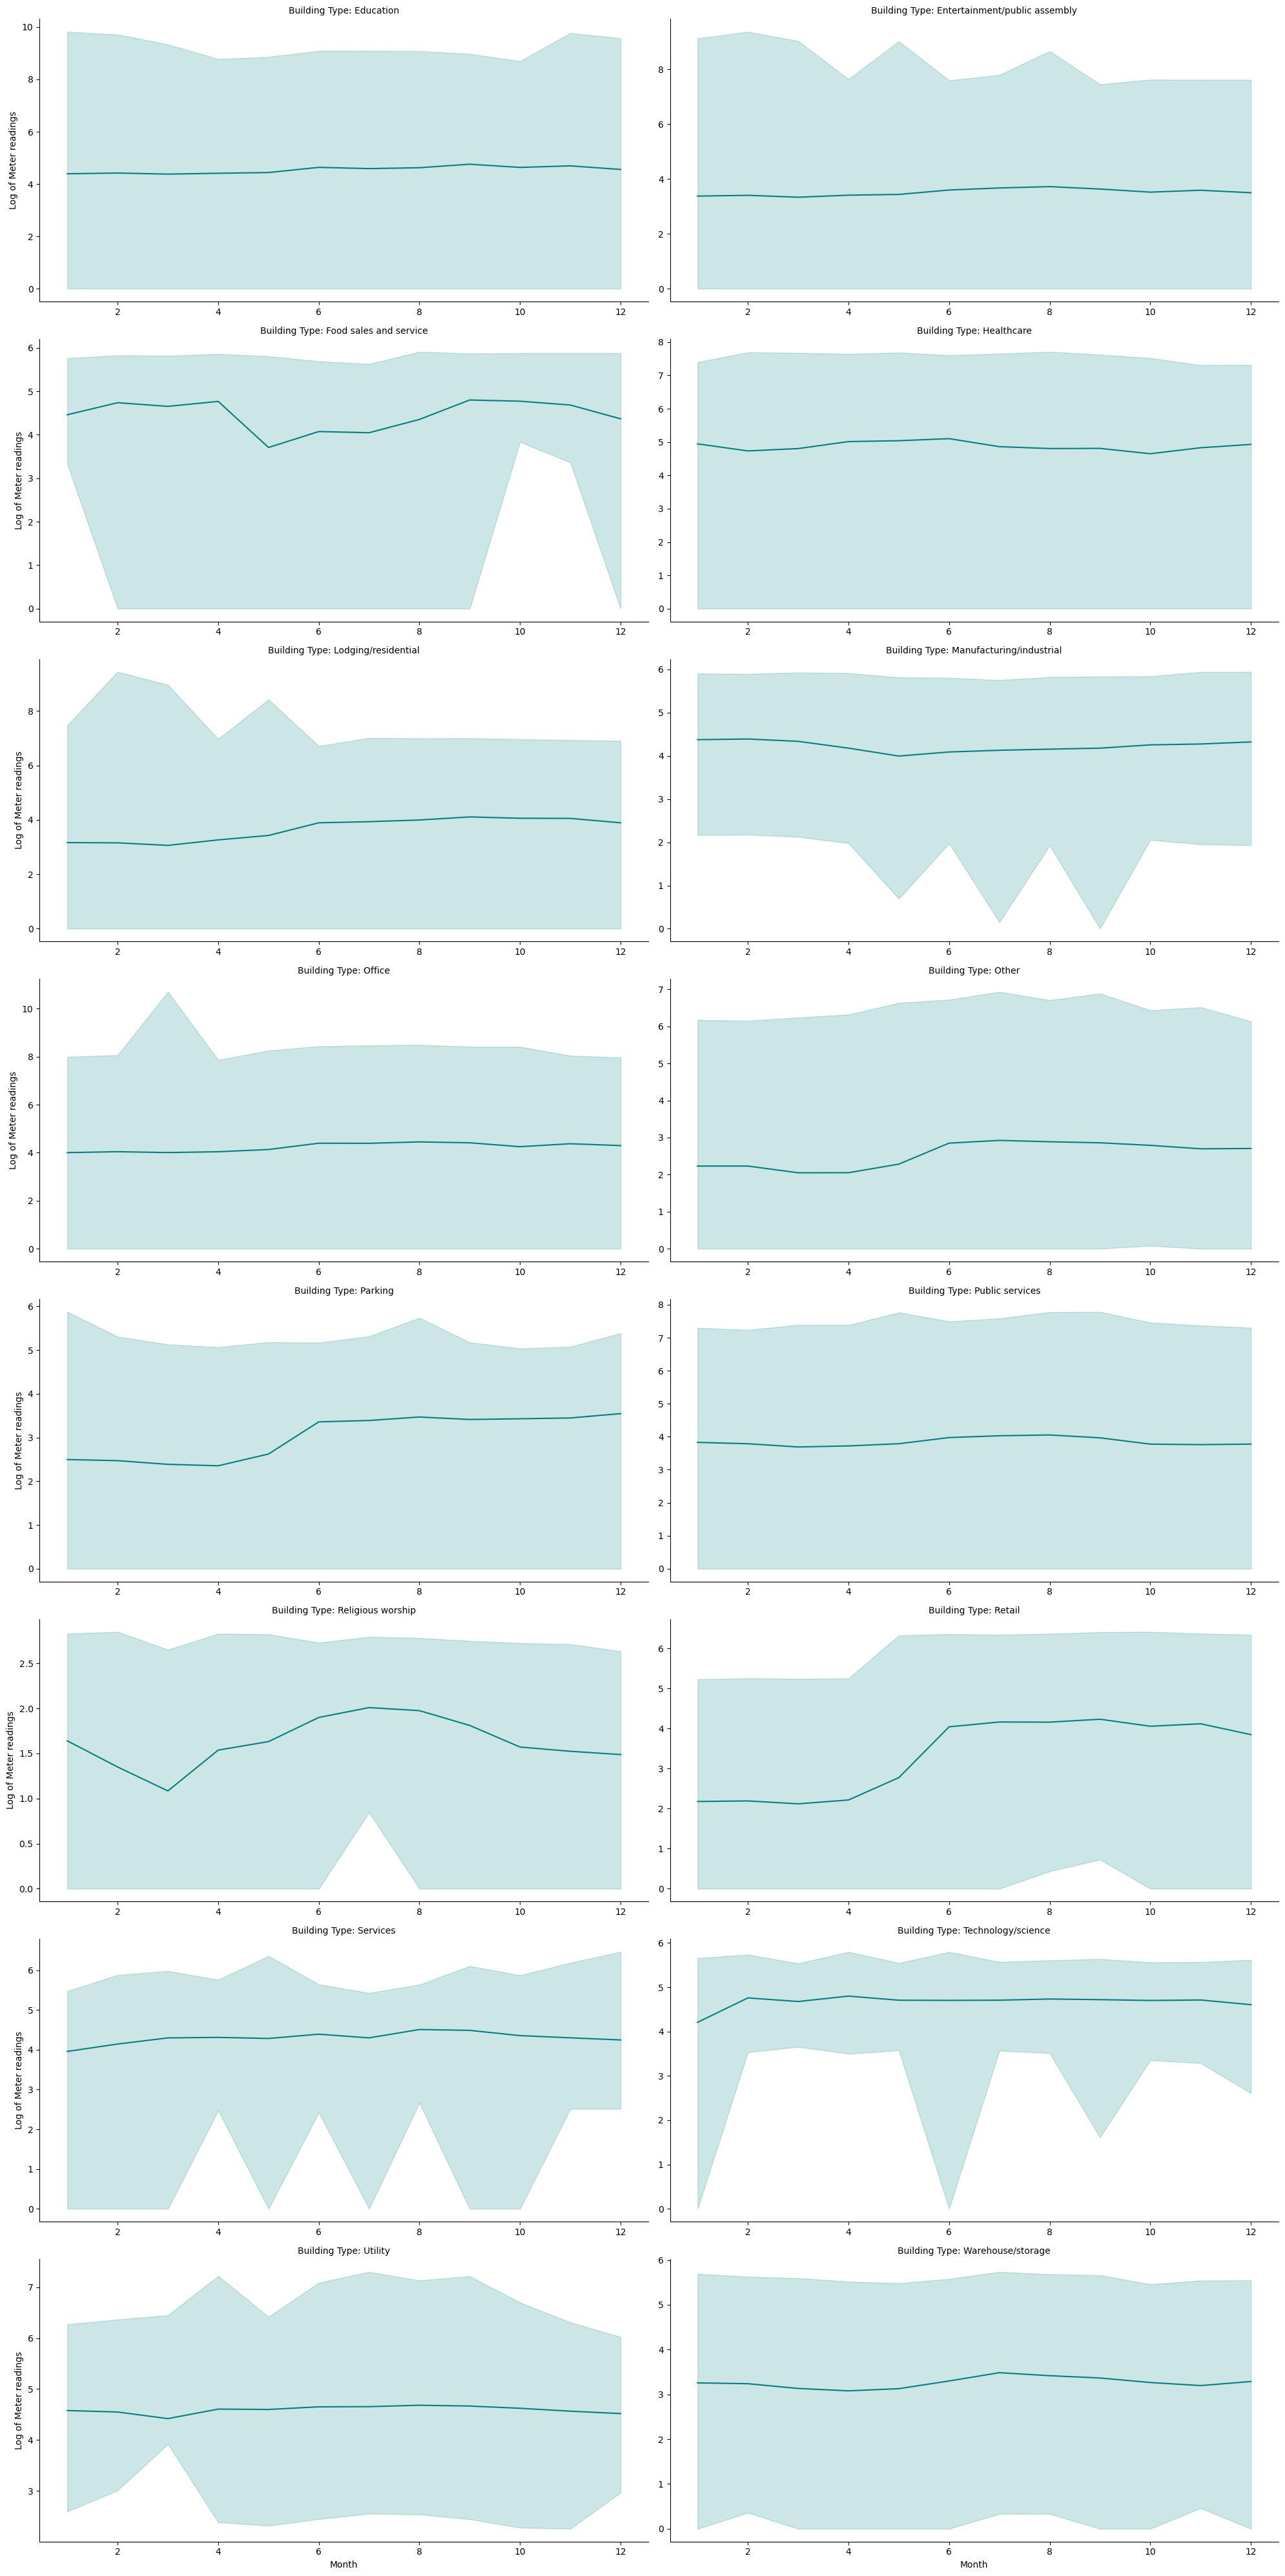

In [78]:
# Monthly average readings based on type of buildings
day_use_df = df.groupby(['month', 'primary_use']).log_meter_reading.agg(['mean', 'min', 'max']).reset_index()

# Set up FacetGrid
p = sns.FacetGrid(day_use_df, col='primary_use', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)

# Map line plots for the average line
p.map(sns.lineplot, 'month', 'mean', color='teal')

# Map shaded regions between min and max values
p.map(plt.fill_between, 'month', 'min', 'max', color='teal', alpha=0.2)

# Set labels and title
p.set_axis_labels('Month', 'Log of Meter readings')
p.set_titles('Building Type: {col_name}')

# Show the plot
plt.show()

# Average consumption by sitewise

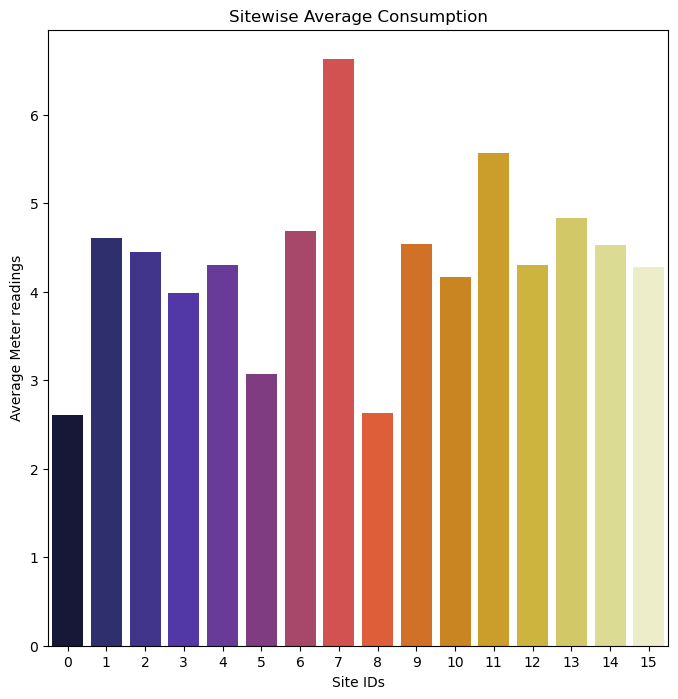

In [79]:
plt.figure(figsize=(8,8))
site_df= df.groupby(['site_id']).log_meter_reading.mean().reset_index()
sns.barplot(x=site_df['site_id'], y=site_df['log_meter_reading'], palette='CMRmap')
plt.ylabel("Average Meter readings")
plt.xlabel("Site IDs")
plt.title("Sitewise Average Consumption")
plt.show()

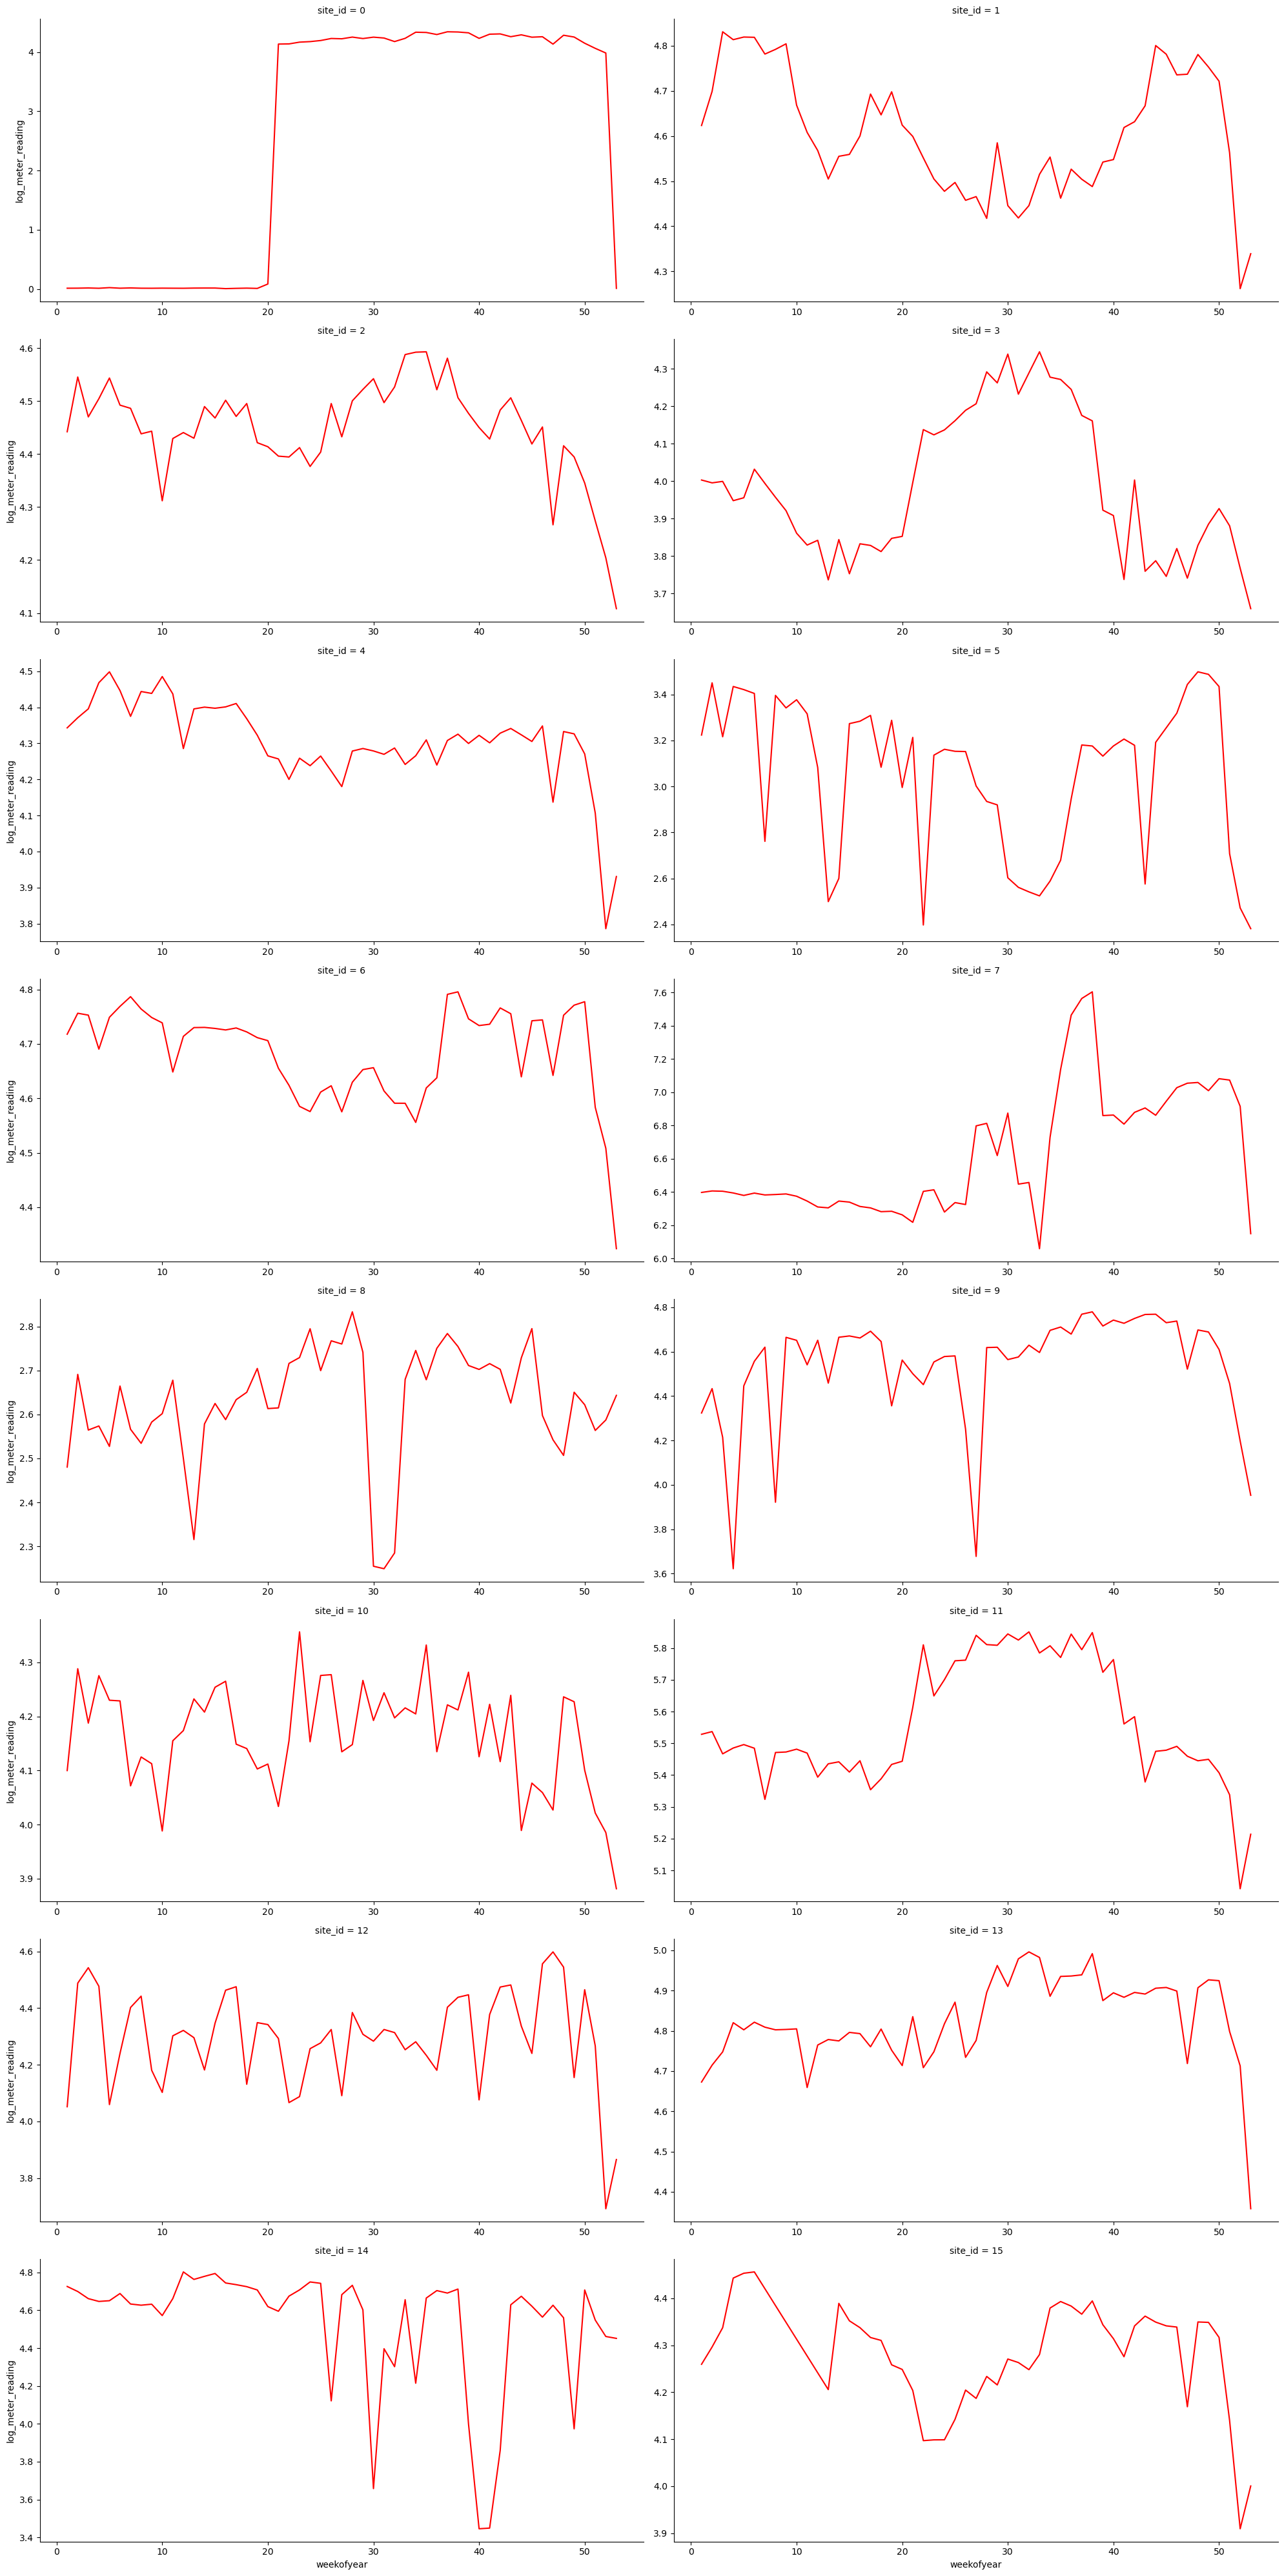

In [82]:
month_use_df= df.groupby(['weekofyear', 'site_id']).log_meter_reading.mean().reset_index()
p=sns.FacetGrid(month_use_df, col='site_id', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'weekofyear', 'log_meter_reading', color='red')
plt.show()

# Average Consumption by building charecteristics

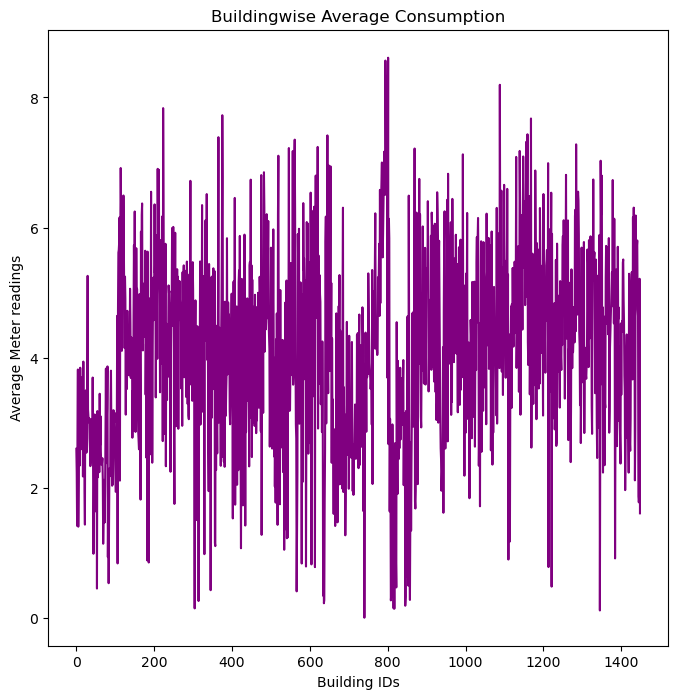

In [60]:
plt.figure(figsize=(8,8))
site_df= df.groupby(['building_id']).log_meter_reading.mean().reset_index()
sns.lineplot(x=site_df['building_id'], y=site_df['log_meter_reading'], color='purple')
plt.ylabel("Average Meter readings")
plt.xlabel("Building IDs")
plt.title("Buildingwise Average Consumption")
plt.show()

As we can see from the above plot, the meter readings vary accross the buildings.

### Distribution plot of square feet

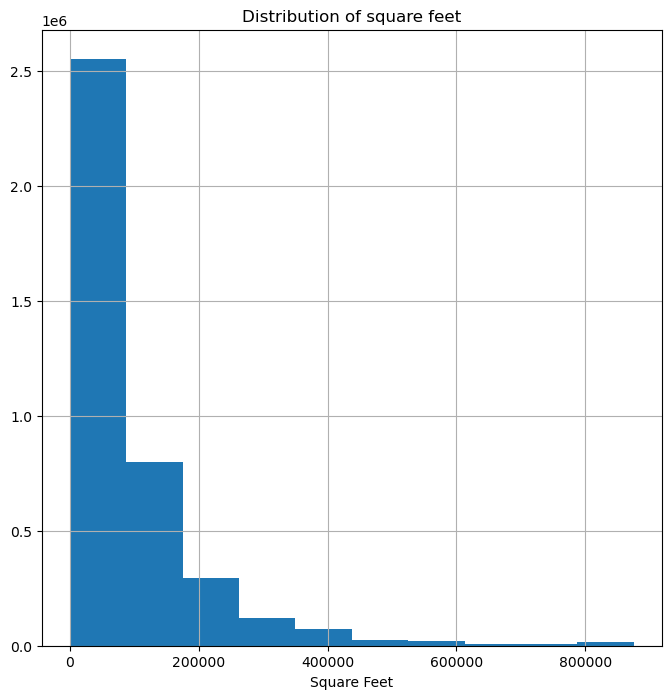

In [61]:
plt.figure(figsize=(8,8))
df['square_feet'].hist()
plt.xlabel("Square Feet")
plt.title("Distribution of square feet")
plt.show()

As the square feet is also heavily skewed and the scale of values is also very large hence we will apply a log transformation here and plot the distribution.

In [62]:
df['log_square_feet']=np.log1p(df['square_feet'])

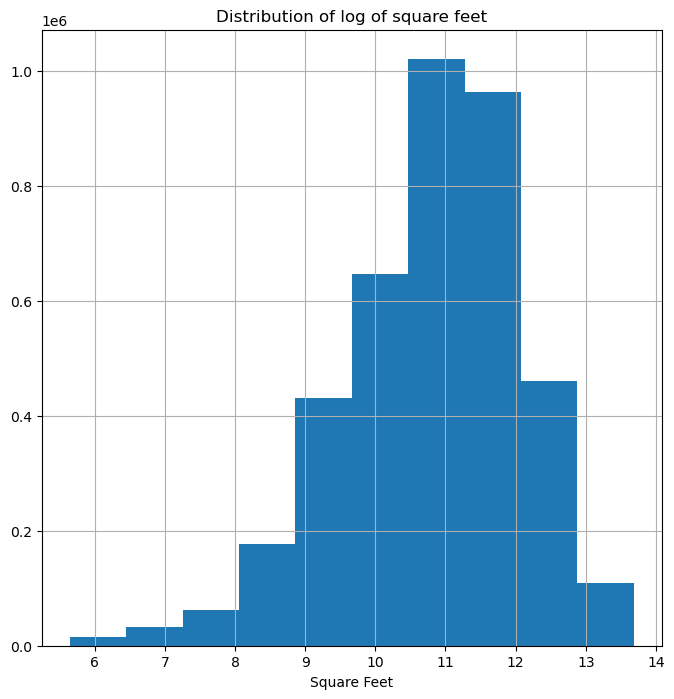

In [63]:
plt.figure(figsize=(8,8))
df['log_square_feet'].hist()
plt.xlabel("Square Feet")
plt.title("Distribution of log of square feet")
plt.show()

Now the distribution looks better after log transformations.

### Mean meter readings by square feet

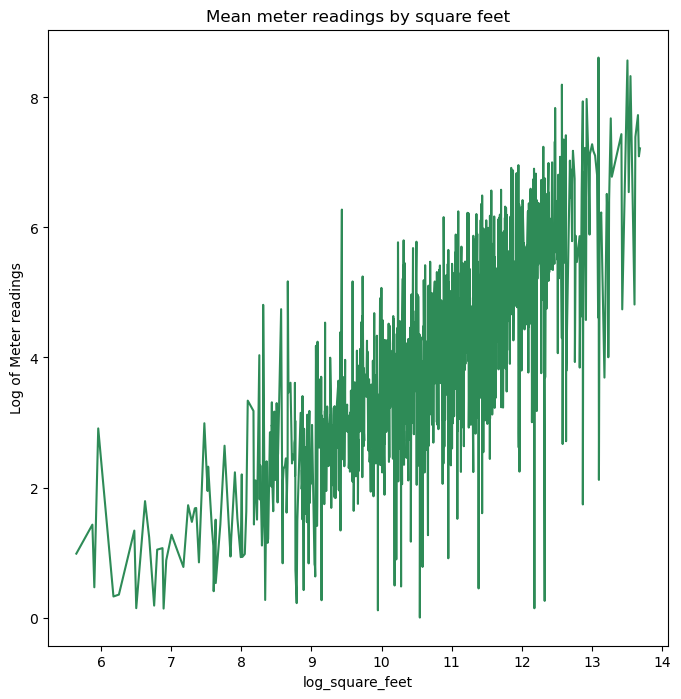

In [64]:
plt.figure(figsize=(8,8))
feet_df= df.groupby('log_square_feet').log_meter_reading.mean().reset_index()
sns.lineplot(x=feet_df['log_square_feet'], y=feet_df['log_meter_reading'], color='seagreen')
plt.ylabel("Log of Meter readings")
plt.title("Mean meter readings by square feet")
plt.show()

There is clear positive relation between the two. As the size of the building increases, the meter consumption also increases.

### Distribution plot of floor count

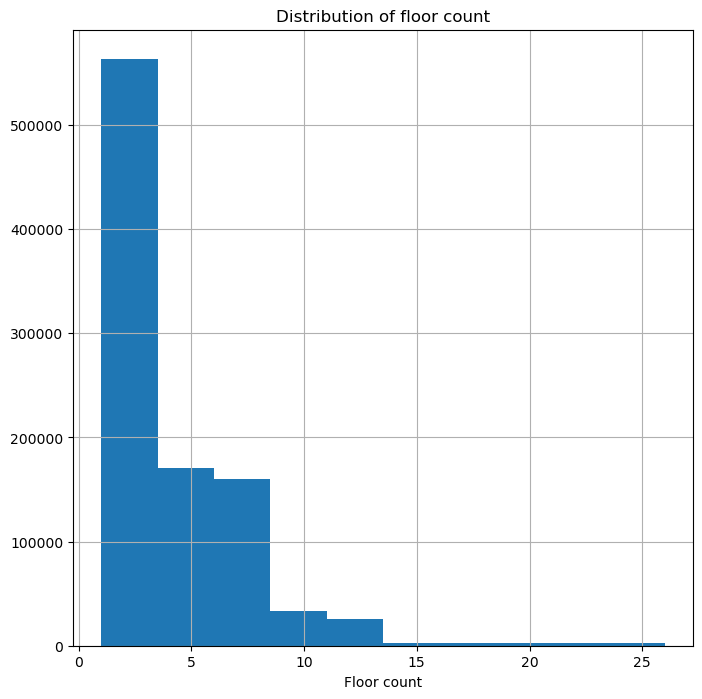

In [65]:
plt.figure(figsize=(8,8))
df['floor_count'].dropna().hist()
plt.xlabel("Floor count")
plt.title("Distribution of floor count")
plt.show()

Not much of the buildings have floors greater than 10. The maximum buildings have floors less than 5.

### Mean meter readings by floor count

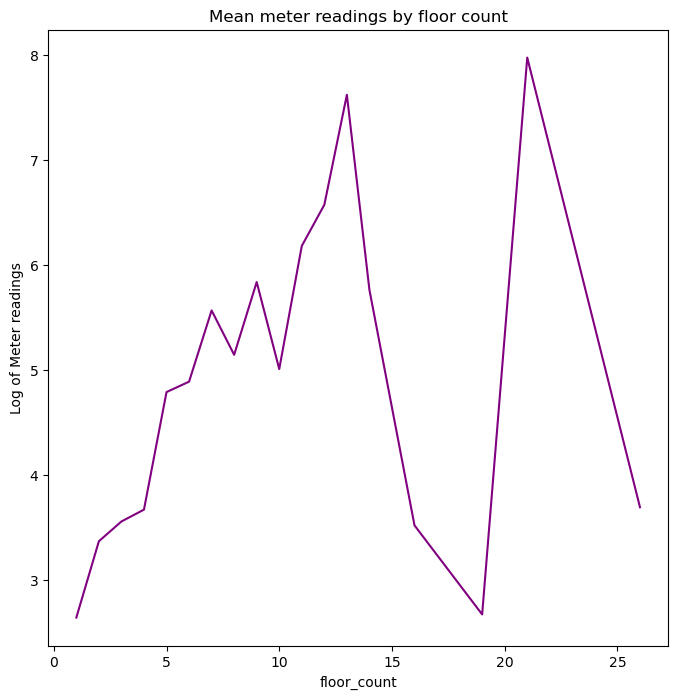

In [66]:
plt.figure(figsize=(8,8))
floor_df= df.groupby('floor_count').log_meter_reading.mean().reset_index()
sns.lineplot(x=floor_df['floor_count'], y=floor_df['log_meter_reading'], color='purple')
plt.ylabel("Log of Meter readings")
plt.title("Mean meter readings by floor count")
plt.show()

When the floor count is more than 10 the meter reading peaks and then drops and then peaks again. This might be due to several reasons like not all the floors are used at a time.

### Distribution plot of year built

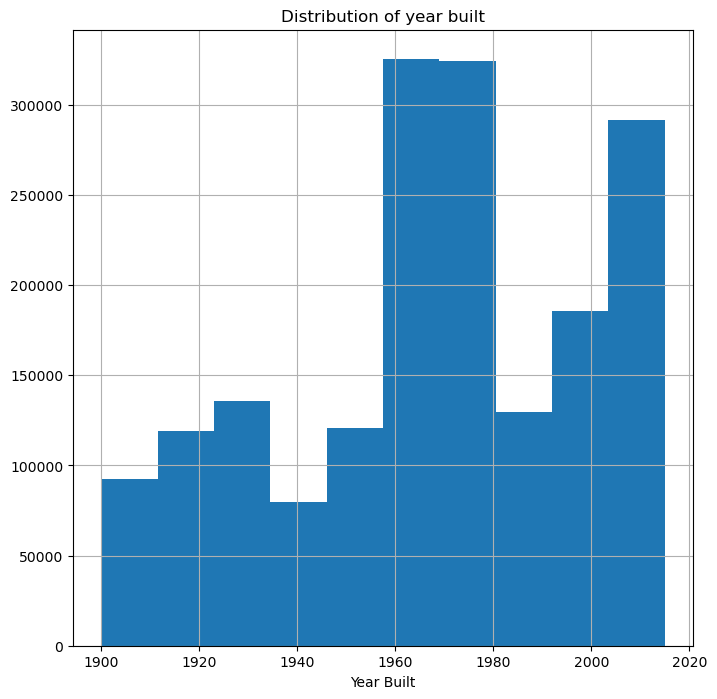

In [67]:
plt.figure(figsize=(8,8))
df['year_built'].dropna().hist()
plt.xlabel("Year Built")
plt.title("Distribution of year built")
plt.show()

The distribution is spread over a period of 120 years. Most of the buildings are built after 1960.

### Mean meter readings by year built

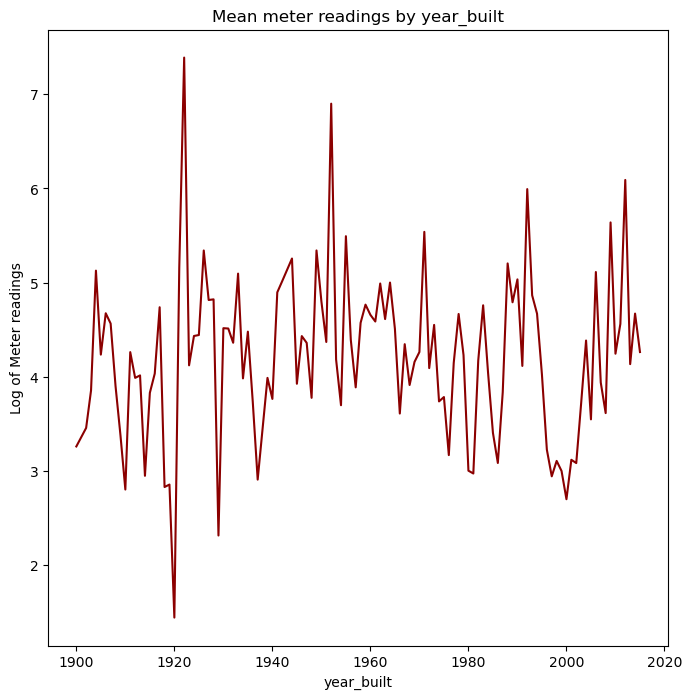

In [68]:
plt.figure(figsize=(8,8))
year_df= df.groupby('year_built').log_meter_reading.mean().reset_index()
sns.lineplot(x=year_df['year_built'], y=year_df['log_meter_reading'], color='darkred')
plt.ylabel("Log of Meter readings")
plt.title("Mean meter readings by year_built")
plt.show()

# Weather Analysis

### Distribution Plot: Air Temperature

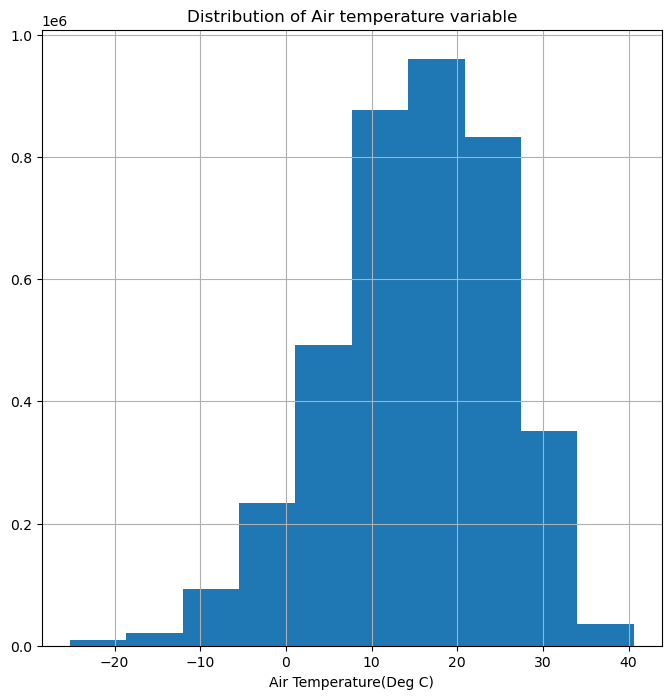

In [69]:
plt.figure(figsize=(8,8))
df['air_temperature'].dropna().hist()
plt.xlabel("Air Temperature(Deg C)")
plt.title("Distribution of Air temperature variable")
plt.show()

The air temperature roughly follows a normal distribution. The maximum observations lie between 0-30 deg C.

### Mean meter readings by air temperature

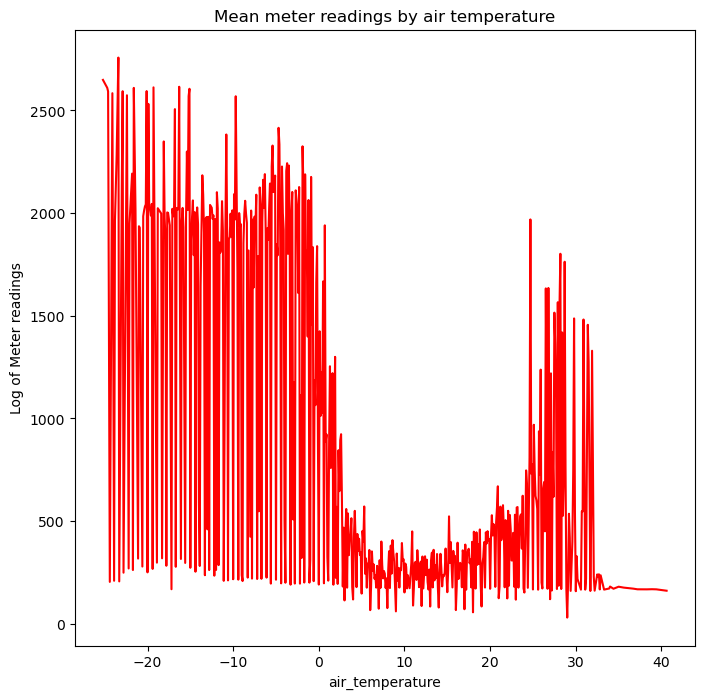

In [70]:
plt.figure(figsize=(8,8))
temp_df= df.groupby('air_temperature').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['air_temperature'], y=temp_df['meter_reading'], color='red')
plt.ylabel("Log of Meter readings")
plt.title("Mean meter readings by air temperature")
plt.show()

The average meter readings are high when the temperature is negative, once it starts increasing, the meter consumption reduces. It again increases when the temperature rises above 15 deg C

### Temperature Distribution of Sites

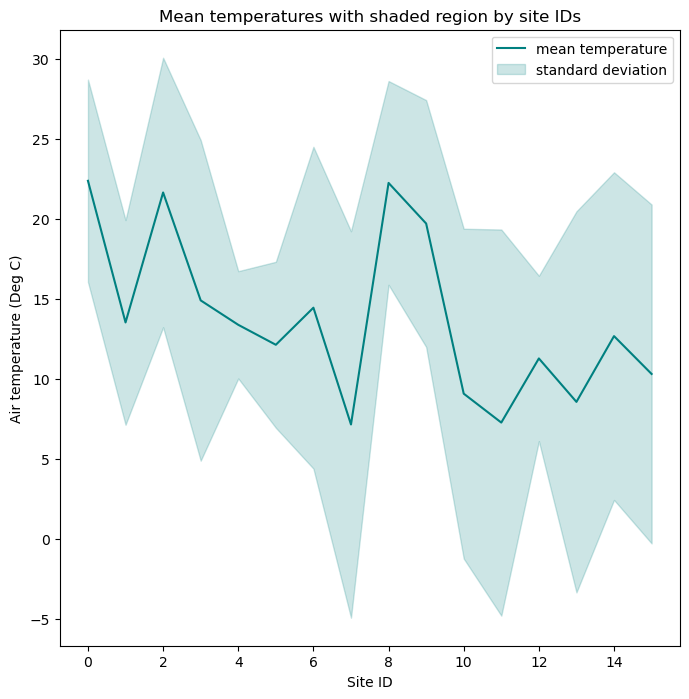

In [83]:
# Mean temperatures by site ids
temp_df = df.groupby('site_id').air_temperature.agg(['mean', 'std']).reset_index()

# Set up the figure
plt.figure(figsize=(8, 8))

# Plot the mean line
sns.lineplot(x='site_id', y='mean', data=temp_df, color='teal', label='mean temperature')

# Plot shaded region for the standard deviation
plt.fill_between(temp_df['site_id'], temp_df['mean'] - temp_df['std'], temp_df['mean'] + temp_df['std'], color='teal', alpha=0.2, label='standard deviation')

# Set labels and title
plt.ylabel("Air temperature (Deg C)")
plt.xlabel("Site ID")
plt.title("Mean temperatures with shaded region by site IDs")
plt.legend()

# Show the plot
plt.show()

There is huge variation in temperatures of various sites. It seems that some sights lie in the northern parts and some in southern parts.

# Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

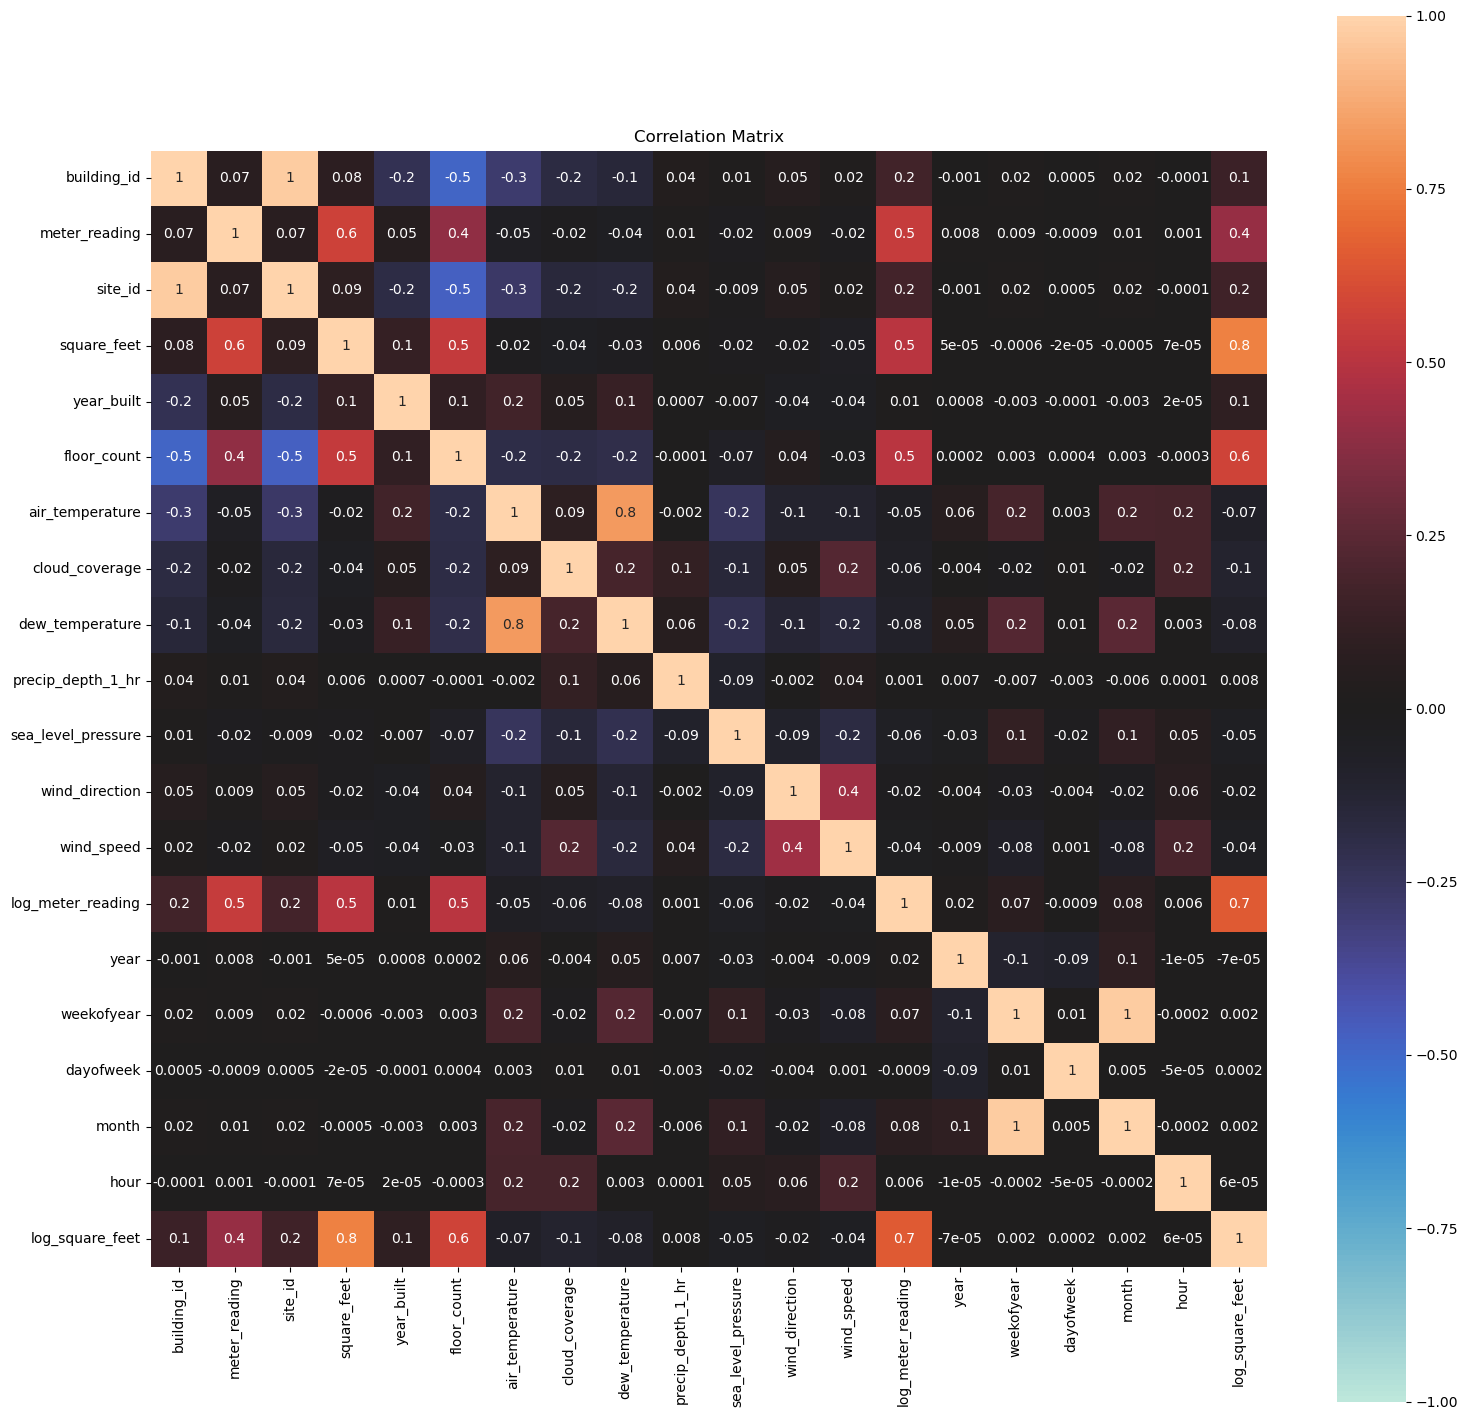

In [72]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr( numeric_only=True), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, square=True)
plt.title('Correlation Matrix')

We have plotted the correlation matrix of the features available. The square feet and floor count features have a strong positive correlation with the target variable. As we know size of the building is a huge factor on how much energy its is consuming. Year built is also having a slight positive correlation.